In [209]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

%matplotlib inline

# Reading files

## Financial data

In [184]:
def extract_financial(year):
    # file list
    path = 'Data/Receitas_Despesas_FNP/' + str(year) + "_*.csv"
    flist = glob.glob(path)
    
    #read first file
    df = pd.read_csv(flist[0], header=3, encoding='latin1')
    # concat all files in a data frame
    for f in flist[1:]:
        df = pd.concat([df, pd.read_csv(f, header=3, encoding='latin1') ], axis=0)
    
    #rename population column
    poplab = u'População ' + str(year)
    df.rename(columns={poplab: 'Populacao'}, inplace=True)
    
    #convert to numeric
    df.iloc[:,1] = pd.to_numeric(df.iloc[:,1].str.replace(',',''), errors='coerce')
    for i in range(3, len(df.columns)):
        if df.dtypes[i]=='object':
            df.iloc[:,i] = pd.to_numeric(df.iloc[:,i].str.replace(',',''), errors='coerce')
    
    #fill population 0 with nan
    df['Populacao'].replace(0, np.nan, inplace=True)
    
    
    #get first 3 columns
    finance = df.loc[:,[u'UF', u'Municípios', u'Populacao']]
    
    #add interesting variables
    finance['tot_revenue'] = df[u'Receita Total'] / df[u'Populacao']
    finance['tot_expense'] = df[u'Despesa Total'] / df[u'Populacao']
    finance['debt_interest_paid'] = df[u'Juros e Encargos da Dívida'] / df[u'Populacao']
    #finance['debt_principal_paid'] = df[u'Amortização da Dívida'] / df[u'Populacao']
    #finance['tot_expense_per_func'] = df[u'TOTAL GERAL DA DESPESA POR FUNÇÃO'] / df[u'Populacao']
    finance['exp_legislative']  = df[u'Legislativa'] / df[u'Populacao']
    finance['exp_administrative']  = df[u'Administração'] / df[u'Populacao']
    finance['exp_pub_safety']  = df[u'Segurança Pública'] / df[u'Populacao']
    finance['exp_health'] = df[u'Saúde'] / df[u'Populacao']
    finance['exp_education'] = df[u'Educação'] / df[u'Populacao']
    finance['exp_urban_infra'] = df[u'Urbanismo'] / df[u'Populacao']
    finance['exp_housing'] = df[u'Habitação'] / df[u'Populacao']
    finance['exp_sanitation'] = df[u'Saneamento'] / df[u'Populacao']
    #finance['exp_agriculture'] = df[u'Agricultura'] / df[u'Populacao']
    finance['exp_industry'] = df[u'Indústria'] / df[u'Populacao']
    finance['exp_business-services'] = df[u'Comércio e Serviços'] / df[u'Populacao']
    finance['exp_soc_assistance'] = df[u'Assistência Social'] / df[u'Populacao']
    finance['exp_soc_security'] = df[u'Previdência Social'] / df[u'Populacao']
    finance['exp_culture'] = df[u'Cultura'] / df[u'Populacao']
    finance['exp_sci-tech'] = df[u'Ciência e Tecnologia'] / df[u'Populacao']
    finance['exp_labor'] = df[u'Trabalho'] / df[u'Populacao']
    finance['exp_transportation'] = df[u'Transporte'] / df[u'Populacao']
    finance['exp_others'] = finance['tot_expense'] - \
                            finance.loc[:,'exp_legislative':'exp_transportation'].sum(1)
    return finance   

In [158]:
# file list
year = 2013
path = 'Data/Receitas_Despesas_FNP/' + str(year) + "_*.csv"
flist = glob.glob(path)

#read first file
df = pd.read_csv(flist[0], header=3, encoding='latin1')
# concat all files in a data frame
for f in flist[1:]:
    df = pd.concat([df, pd.read_csv(f, header=3, encoding='latin1') ], axis=0)

#rename population column
poplab = u'População ' + str(year)
df.rename(columns={poplab: 'Populacao'}, inplace=True)

#convert to numeric
df.iloc[:,1] = pd.to_numeric(df.iloc[:,1].str.replace(',',''), errors='coerce')
for i in range(3, len(df.columns)):
    if df.dtypes[i]=='object':
        df.iloc[:,i] = pd.to_numeric(df.iloc[:,i].str.replace(',',''), errors='coerce')

In [168]:
df.std()

Populacao                                          2.496277e+05
Receita Total                                      1.019171e+09
Receitas Correntes                                 9.772842e+08
Receita tributária                                 4.562123e+08
Receitas de Contribuições                          3.215584e+07
Receita Patrimonial                                2.431680e+07
Receita Agropecuária                               3.819266e+04
Receita Industrial                                 3.387589e+05
Receita de Serviços                                2.453742e+07
Transferências Correntes                           3.987638e+08
Outras Receitas Correntes                          6.945539e+07
Receitas de Capital                                3.830622e+07
Deduções da Receita Corrente                       5.106833e+07
Receitas Correntes Intra-Orçamentárias             6.341030e+07
Receitas de Capital Intra-Orçamentárias            5.115633e+06
Despesa Total                           

In [185]:
finance={}

for i in range(2004, 2017):
    print i
    finance[i] = extract_financial(i)

2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


In [199]:
finMeans = [finance[i].iloc[:,3:].mean(0) for i in range(2004, 2017)]

In [200]:
finTS = pd.DataFrame(np.array(finMeans).T, 
                     columns=range(2004, 2017), index=finance[2004].columns[3:])
finTS.head()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
tot_revenue,1628.806976,1812.575863,2003.898077,2180.502557,2472.089133,2382.137268,2631.691125,2845.070059,2975.986108,2941.836177,3092.706124,2935.663331,3017.627529
tot_expense,1606.999401,1774.679814,2013.227863,2140.507351,2419.103915,2389.912975,2628.749281,2793.082820,2978.361794,2885.234136,3117.145031,2936.824406,2905.479036
debt_interest_paid,3.632410,4.260299,4.197804,4.367654,4.957662,5.265798,4.846882,5.369239,6.342842,5.240288,4.649557,4.648994,5.345515
exp_legislative,70.448162,76.782058,84.936181,89.536218,92.049412,107.186913,96.946837,99.136044,101.271091,111.246261,114.708958,112.601047,110.848670
exp_administrative,283.232546,327.840262,339.870496,363.572251,385.093039,405.317628,418.302355,449.513184,431.190526,452.849397,470.217704,437.254740,414.450340


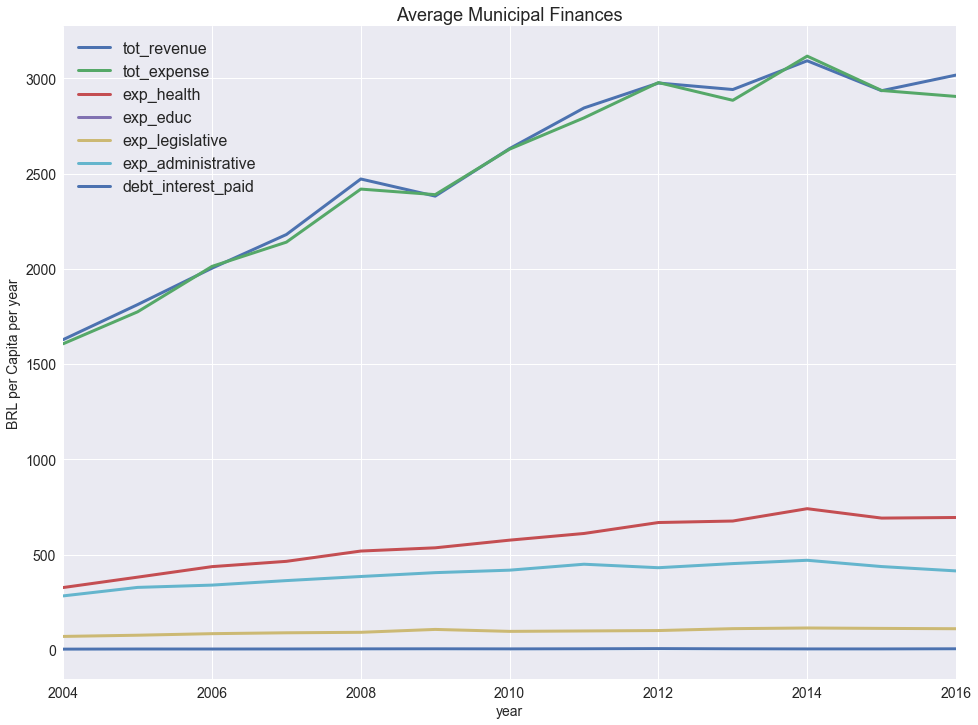

In [231]:
lst = ['tot_revenue', 'tot_expense', 'exp_health', 'exp_educ',
       'exp_legislative', 'exp_administrative', 'debt_interest_paid']

fig = finTS.loc[lst].T.plot(figsize=(16,12), fontsize=14, linewidth=3)
plt.ylabel('BRL per Capita per year', fontsize='14')
plt.xlabel('year',fontsize='14')
plt.title('Average Municipal Finances', fontsize=18)
plt.legend(fontsize=16)
plt.savefig('AvgFinances.png')

## Health data

In [103]:
health = pd.read_csv('Data/DATASUS/CoberturaBasica_2008.csv', 
                     header=3, delimiter=';', decimal=',', encoding='latin1')
health.head()

,Município,1._Cob_equipes_atenção_básica
0,110001 Alta Floresta D'Oeste,"46,17"
1,110037 Alto Alegre dos Parecis,"77,63"
2,110040 Alto Paraíso,"53,11"
3,110034 Alvorada D'Oeste,"17,77"
4,110002 Ariquemes,"47,70"


In [105]:
health.rename(columns={u'1._Cob_equipes_atenção_básica':'2008'}, inplace=True)
health['2008'] = pd.to_numeric(health['2008'].str.replace(',','.'), errors='coerce')
health.head()

,Município,2008
0,110001 Alta Floresta D'Oeste,46.17
1,110037 Alto Alegre dos Parecis,77.63
2,110040 Alto Paraíso,53.11
3,110034 Alvorada D'Oeste,17.77
4,110002 Ariquemes,47.70


In [106]:
for i in range(2009, 2016):
    year = str(i)
    path = 'Data/DATASUS/CoberturaBasica_' + year + '.csv'
    hdata = pd.read_csv(path, header=3, delimiter=';', decimal=',', encoding='latin1')
    hdata.rename(columns={u'1._Cob_equipes_atenção_básica':year}, inplace=True)
    hdata[year] = pd.to_numeric(hdata[year].str.replace(',','.'), errors='coerce')
    
    health = pd.merge(health, hdata, how='outer', on=u'Município')
    
health.describe()

,2008,2009,2010,2011,2012,2013,2014,2015
count,5565.000000,5566.000000,5566.000000,5566.000000,5566.000000,5571.000000,5571.000000,5571.000000
mean,84.987173,85.985057,86.590555,86.643793,86.848854,88.169284,91.935426,91.997509
std,22.622351,21.517245,20.982420,21.348352,21.362484,20.019239,16.269111,16.164382
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.660000,76.590000,77.902500,78.622500,78.910000,82.000000,92.085000,91.740000
50%,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
75%,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


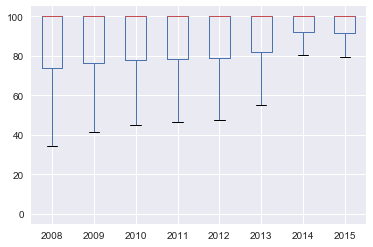

In [108]:
health.boxplot()
plt.show()

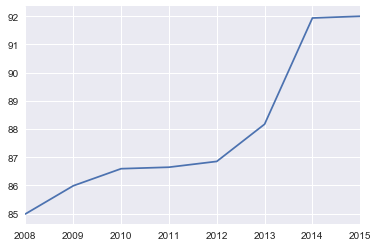

In [109]:
health.mean().plot()
plt.show()

## Education

In [110]:
educ = pd.read_excel('Data/IDEB/Anos Iniciais/IDEB_2015_ANOS_INICIAIS_MUNICIPIOS.xlsx', sheetname='Sheet1', header=1)
educ.head()

,UF,ID,Municipio,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,RO,1100015,Alta Floresta D'Oeste,3.7,3.85,4,4.25,4.5,4.40,4.3,4.85,5.4,5.60,5.8
1,RO,1100023,Ariquemes,3.7,3.80,3.9,4.15,4.4,4.50,4.6,4.75,4.9,5.05,5.2
2,RO,1100031,Cabixi,3.7,3.75,3.8,4.20,4.6,4.90,5.2,5.40,5.6,5.55,5.5
3,RO,1100049,Cacoal,4,4.00,4,4.20,4.4,4.80,5.2,5.50,5.8,5.85,5.9
4,RO,1100056,Cerejeiras,4,4.25,4.5,4.70,4.9,5.15,5.4,5.80,6.2,6.05,5.9


In [121]:
educ.ID = str(educ.ID)
for year in range(2005, 2016, 2):
    educ[year] = pd.to_numeric(educ[year], errors='coerce')

In [122]:
educ.dtypes

UF            object
ID            object
Municipio     object
2005         float64
2006         float64
2007         float64
2008         float64
2009         float64
2010         float64
2011         float64
2012         float64
2013         float64
2014         float64
2015         float64
dtype: object

In [123]:
educ.describe()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,5022.000000,5014.000000,5483.000000,5375.000000,5404.000000,5168.000000,5227.000000,5117.000000,5304.000000,5166.000000,5280.000000
mean,3.607467,3.799900,4.011873,4.263395,4.519375,4.667454,4.830419,4.927115,5.034087,5.193428,5.358239
std,0.910893,0.863331,0.891285,0.908326,1.004569,0.963968,0.989617,0.996664,1.068075,1.003071,0.997740
min,1.100000,1.350000,0.900000,1.700000,1.400000,2.350000,2.500000,2.600000,2.300000,2.700000,2.300000
25%,2.800000,3.050000,3.300000,3.450000,3.700000,3.850000,4.000000,4.050000,4.100000,4.350000,4.500000
50%,3.600000,3.850000,4.000000,4.300000,4.600000,4.750000,4.900000,5.050000,5.200000,5.350000,5.500000
75%,4.300000,4.500000,4.700000,5.000000,5.300000,5.450000,5.600000,5.700000,5.900000,6.000000,6.100000
max,7.300000,6.850000,7.700000,7.800000,8.600000,8.250000,8.300000,7.650000,8.300000,8.300000,8.800000


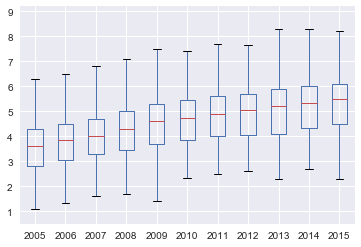

In [125]:
educ.boxplot()
plt.show()

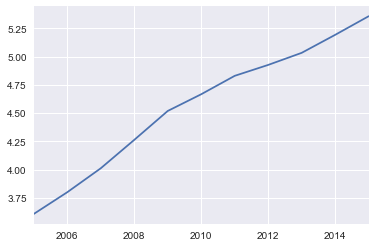

In [126]:
educ.mean().plot()
plt.show()